<a href="https://colab.research.google.com/github/DavBelM/Multimodal_Data_Preprocessing/blob/main/Formative2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Display Settings

In [4]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Datasets

In [5]:
social = pd.read_csv('/content/customer_social_profiles - customer_social_profiles.csv')
transactions = pd.read_csv('/content/customer_transactions - customer_transactions.csv')

## Exploratory Data Analysis

## Social Profiles Dataset

In [6]:
social.head()

,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,A178,LinkedIn,74,4.9,Positive
1,A190,Twitter,82,4.8,Neutral
2,A150,Facebook,96,1.6,Positive
3,A162,Twitter,89,2.6,Positive
4,A197,Twitter,92,2.3,Neutral


In [7]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          155 non-null    object 
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ KB


In [8]:
social.describe()

,engagement_score,purchase_interest_score
count,155.000000,155.000000
mean,75.606452,3.152903
std,14.568021,1.142867
min,50.000000,1.000000
25%,63.500000,2.350000
50%,77.000000,3.200000
75%,87.500000,4.100000
max,99.000000,5.000000


In [9]:
missing_social = social.isnull().sum()
missing_social_pct = (missing_social / len(social)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_social,
    'Percentage': missing_social_pct
})
display(missing_info[missing_info['Missing Count'] > 0])

,Missing Count,Percentage


In [10]:
# Checking for duplicates
print(f"\n Duplicate Rows: {social.duplicated().sum()}")


 Duplicate Rows: 5


## Transactions Dataset

In [11]:
transactions.head()


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


In [12]:
transactions[transactions['customer_id_legacy'] == 150]

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
41,150,1042,389,2024-02-11,Sports,NaN
45,150,1046,177,2024-02-15,Books,3.6


In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    object 
 5   customer_rating     140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


In [14]:
transactions.describe()

,customer_id_legacy,transaction_id,purchase_amount,customer_rating
count,150.000000,150.000000,150.000000,140.00000
mean,148.760000,1075.500000,280.780000,2.98500
std,30.046425,43.445368,121.329595,1.20699
min,100.000000,1001.000000,51.000000,1.00000
25%,121.250000,1038.250000,179.000000,1.95000
50%,150.500000,1075.500000,274.000000,3.00000
75%,174.750000,1112.750000,388.500000,4.00000
max,199.000000,1150.000000,495.000000,5.00000


In [15]:
missing_trans = transactions.isnull().sum()
missing_trans_pct = (missing_trans / len(transactions)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_trans,
    'Percentage': missing_trans_pct
})
display(missing_info[missing_info['Missing Count'] > 0])

,Missing Count,Percentage
customer_rating,10,6.666667


In [16]:
print(f"\n Duplicate Rows: {transactions.duplicated().sum()}")


 Duplicate Rows: 0


## Visualization

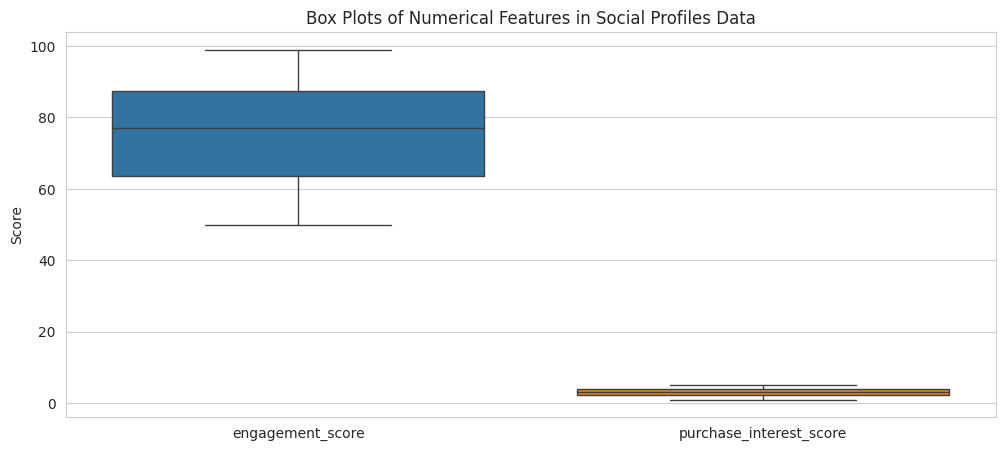

In [17]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=social[['engagement_score', 'purchase_interest_score']])
plt.title('Box Plots of Numerical Features in Social Profiles Data')
plt.ylabel('Score')
plt.show()

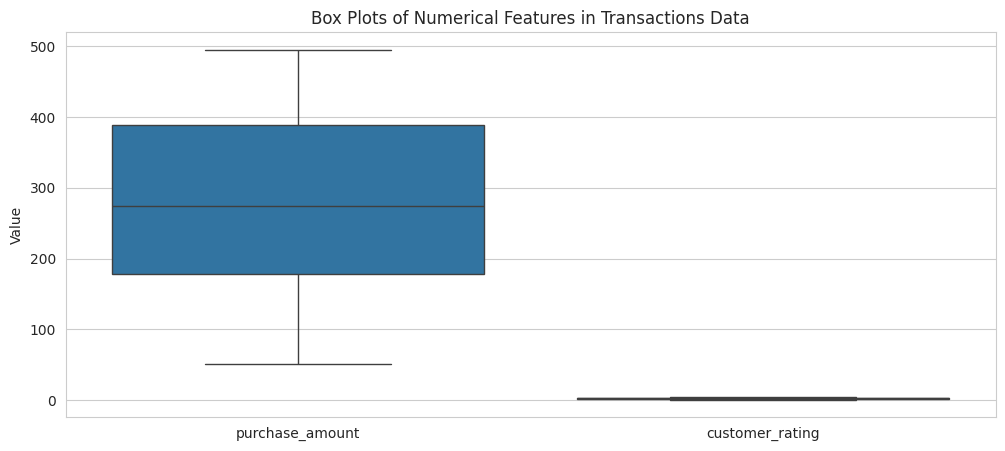

In [18]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=transactions[['purchase_amount', 'customer_rating']])
plt.title('Box Plots of Numerical Features in Transactions Data')
plt.ylabel('Value')
plt.show()

### Correlation Heatmap for Social Profiles Data

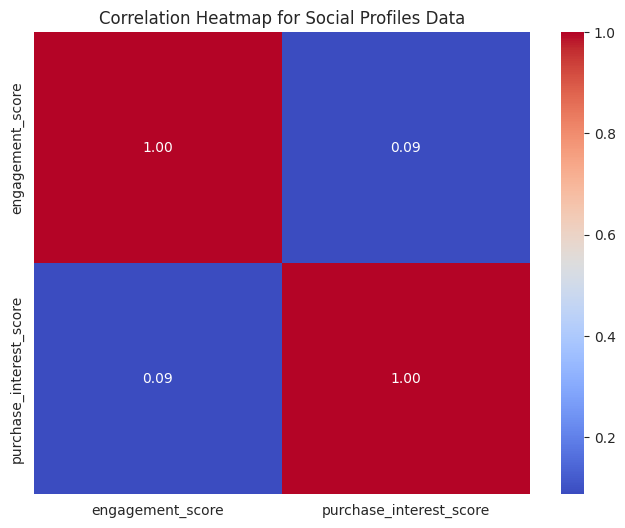

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(social[['engagement_score', 'purchase_interest_score']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Social Profiles Data')
plt.show()

### Correlation Heatmap for Transactions Data

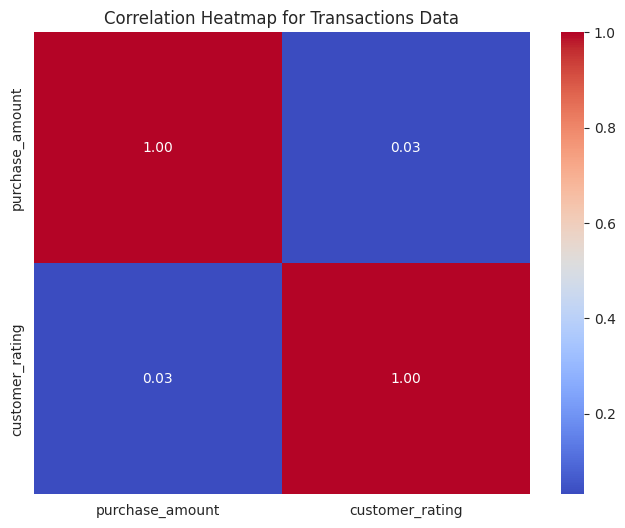

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(transactions[['purchase_amount', 'customer_rating']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Transactions Data')
plt.show()

## Data Cleaning

## Handling Missing Values

In [21]:
transactions['customer_rating'].fillna(transactions['customer_rating'].mean(), inplace=True)

## Handle Duplicates

In [22]:
transactions = transactions.drop_duplicates()

## Change Data Types

In [23]:
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id_legacy  150 non-null    int64         
 1   transaction_id      150 non-null    int64         
 2   purchase_amount     150 non-null    int64         
 3   purchase_date       150 non-null    datetime64[ns]
 4   product_category    150 non-null    object        
 5   customer_rating     150 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 7.2+ KB


In [24]:
social['customer_id_new'] = social['customer_id_new'].str.extract('(\\d+)').astype(int)
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          155 non-null    int64  
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 6.2+ KB


## Data Merge

In [25]:
# checking missing values again
missing_trans = transactions.isnull().sum()
missing_trans_pct = (missing_trans / len(transactions)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_trans,
    'Percentage': missing_trans_pct
})
display(missing_info[missing_info['Missing Count'] > 0])

,Missing Count,Percentage


In [26]:
social.rename(columns={'customer_id_new': 'customer_id'}, inplace=True)
transactions.rename(columns={'customer_id_legacy' : "customer_id"}, inplace=True)
print(social.info(), transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              155 non-null    int64  
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 6.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       150 non-null    int64         
 1   transaction_id    150 non-null    int64         
 2   purchase_amount   150 non-null    int64         
 3   purchase_date     150 non-null    datetime64[ns]
 4   product_category  150 n

In [27]:
merged = pd.merge(
    social,
    transactions,
    on='customer_id',
    how='inner'      #only customers present in both datasets
)
merged.head()

,customer_id,social_media_platform,engagement_score,purchase_interest_score,review_sentiment,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,190,Twitter,82,4.8,Neutral,1031,333,2024-01-31,Groceries,3.800
1,190,Twitter,82,4.8,Neutral,1140,401,2024-05-19,Sports,4.900
2,150,Facebook,96,1.6,Positive,1042,389,2024-02-11,Sports,2.985
3,150,Facebook,96,1.6,Positive,1046,177,2024-02-15,Books,3.600
4,162,Twitter,89,2.6,Positive,1079,101,2024-03-19,Books,4.200


In [28]:
merged['customer_id'].value_counts().head()

,count
customer_id,
187,15
189,15
103,9
107,9
120,9


In [29]:
tx_agg = transactions.groupby('customer_id').agg({
    'purchase_amount': 'mean',
    'product_category': lambda x: x.mode()[0],
    'customer_rating': 'mean'
}).reset_index()
merged = pd.merge(social, tx_agg, on='customer_id', how='inner')

In [30]:
merged['customer_id'].value_counts().head()

,count
customer_id,
189,5
125,5
185,4
151,3
150,3
